<function matplotlib.pyplot.show(close=None, block=None)>

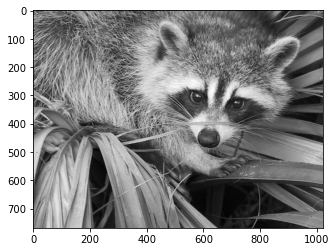

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face

image = face(True)

plt.imshow(image, cmap = "gray")

In [2]:
def convolve(image, mask):
    image_bounded = np.zeros((image.shape[0]+2, image.shape[1]+2))
    image_bounded[1:-1, 1:-1] = image
    result = np.zeros_like(image)
    for y in range(1, image_bounded.shape[0] -1 ):
        for x in range(1, image_bounded.shape[1] - 1):
            sub = image_bounded[y-1:y+2, x-1: x+2]
            new_value = np.sum(sub * mask)#/np.sum(mask)
            result[y-1, x-1] = new_value
    return result

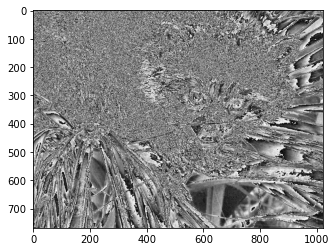

In [3]:
img = face(True).astype('f4')

mask = np.array([[-1, 2, -1], [2, 2, 2], [-1, 2, -1]])
conv_image = convolve(image, mask)
plt.imshow(conv_image, cmap='gray')

In [4]:
def match(a, masks):
    for mask in masks:
#         if np.all(np.array_equal(a,mask)):
        if np.all(a==mask):
            return True
    return False

In [8]:
def count_objects(image):
    inner, outer, diag = 0, 0, 0
    for y in range(0, image.shape[0]-1):
        for x in range(0, image.shape[1]-1):
            sub = image[y:y+2, x:x+2]
            if match(sub, outer_masks):
                outer+=1
                continue
            if match(sub, inner_masks):
                inner+=1
                continue
            if match(sub, diag_mask):
                diag+=1
    print(f'Innner = {inner}, outer = {outer}')
    return (outer+(diag*2) - inner) / 4 

In [9]:
inner_masks = [np.array([[1,1],[1,0]]),
               np.array([[1,1],[0,1]]),
               np.array([[1,0],[1,1]]),
               np.array([[0,1],[1,1]])]

outer_masks = [np.array([[0,0],[0,1]]),
               np.array([[0,0],[1,0]]),
               np.array([[0,1],[0,0]]),
               np.array([[1,0],[0,0]])]

diag_mask = [np.array([[0,1],[1,0]]),
               np.array([[1,0],[0,1]])]

Innner = 0, outer = 12
3.0


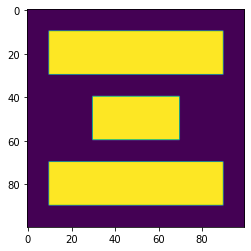

In [10]:
image = np.load('src/cex1npy.txt')

image = np.sum(image, 2)
print(count_objects(image))
plt.imshow(image)

Innner = 2, outer = 10
2.0
Innner = 0, outer = 8
2.0
Innner = 2, outer = 10
2.0


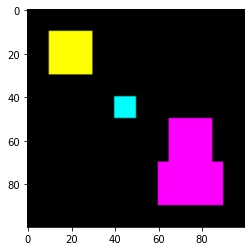

In [11]:
img = np.load('src/cex2npy.txt')

for i in range(img.shape[2]):
    print(count_objects(img[:,:,i]))
plt.imshow(img)